# Importing necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Importing the dataset

In [4]:
#importing the dataset
df= pd.read_csv('Thyroid_Diff.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


# Exploratory Data Analysis

In [6]:
#EXPLORATORY DATA ANALYSIS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [7]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [8]:
#listing all the columns
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [9]:
#checking for missing values
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [10]:
#checking for the shape
df.shape

(383, 17)

In [11]:
#descriptive analysis
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


This dataset has 383 rows and 17 columns, and there are NO MISSING VALUES

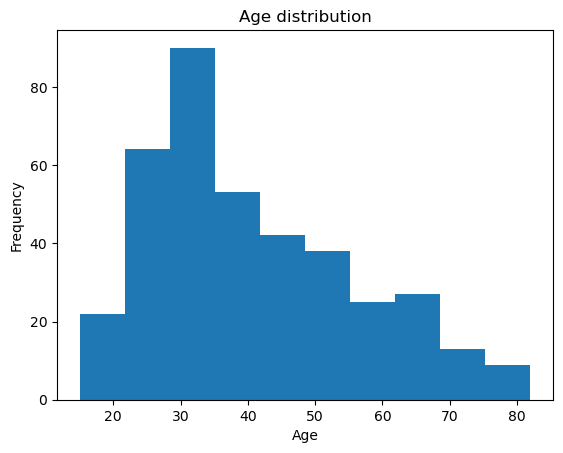

In [13]:
#plot age distribution
plt.hist(df['Age'], bins = 10)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

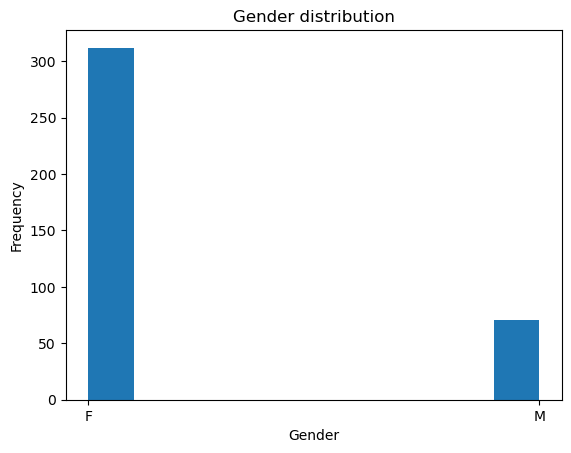

In [14]:
#plot gender distribution
plt.hist(df['Gender'], bins = 10)
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [15]:
#SMOKING HABITS--- calculating smoking prevalence
smoking_prevalence = df['Smoking'].value_counts()
print(smoking_prevalence)

Smoking
No     334
Yes     49
Name: count, dtype: int64


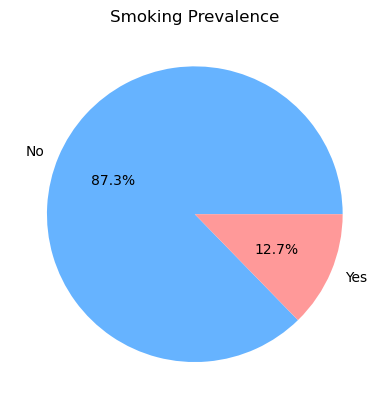

In [16]:
#using a pie chart
smoking_prevalence = [0.872, 0.127]
labels = ['No', 'Yes']
colors = ['#66b3ff', '#ff9999']

#Create the pie chart
plt.pie(smoking_prevalence, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Smoking Prevalence')
plt.show()

In [17]:
#Determine factors responsible for thyroid cancer recurrence
#1.Examine relationship between smoking and recurred

#Creating a contigency table

contingency_table = pd.crosstab(df['Smoking'], df['Recurred'])
print(contingency_table)


Recurred   No  Yes
Smoking           
No        259   75
Yes        16   33


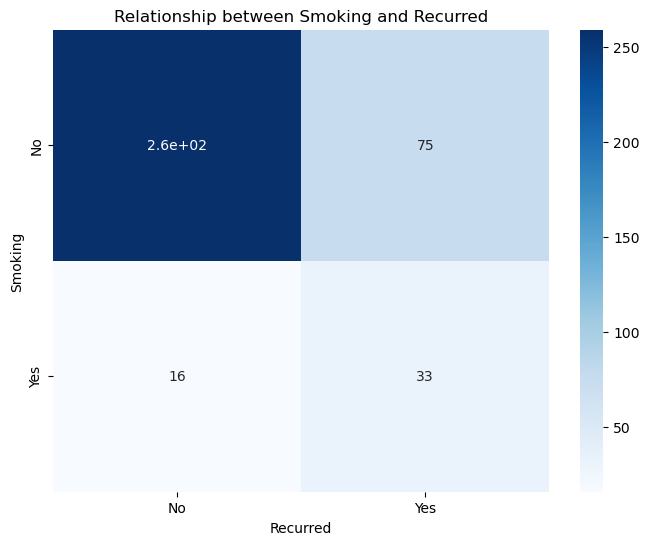

In [18]:
#Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Relationship between Smoking and Recurred')
plt.xlabel('Recurred')
plt.ylabel('Smoking')
plt.show()


The heatmap suggests that the majority of patients(260 cases) are non-smokers who did not experience recurrence.
Smokers who experienced recurrence (33 cases) are less frequent than non-smokers who experienced recurrence (75 cases)


In [20]:
#Examine relationship between stage and recurred

#Creating a contigency table

contingency_table = pd.crosstab(df['Stage'], df['Recurred'])
print(contingency_table)

Recurred   No  Yes
Stage             
I         268   65
II          7   25
III         0    4
IVA         0    3
IVB         0   11


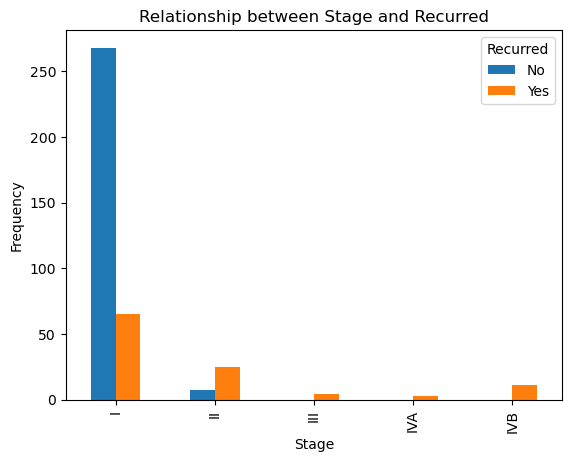

In [21]:
contingency_table.plot(kind='bar')
plt.title('Relationship between Stage and Recurred')
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.show()

In [23]:
#Examine relationship between pathology and recurred

#Creating a contigency table

contingency_table = pd.crosstab(df['Pathology'], df['Recurred'])
print(contingency_table)

Recurred         No  Yes
Pathology               
Follicular       16   12
Hurthel cell     14    6
Micropapillary   48    0
Papillary       197   90


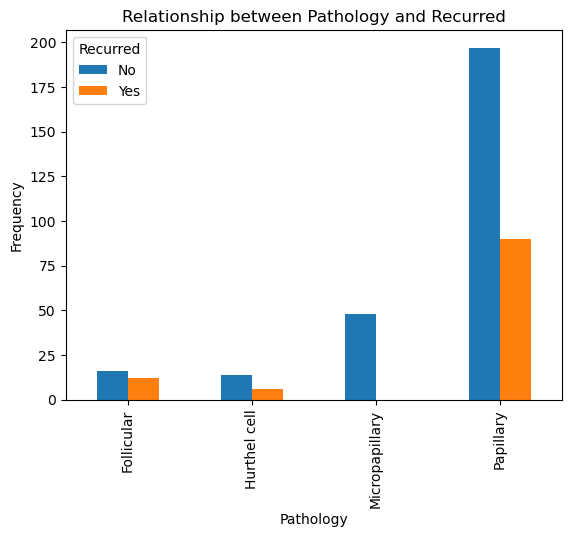

In [24]:
contingency_table.plot(kind='bar')
plt.title('Relationship between Pathology and Recurred')
plt.xlabel('Pathology')
plt.ylabel('Frequency')
plt.show()

The pathologhy type with the highest recurrence was PAPILLARY, followed by FOLLICULAR, then HURTHEL CELL.

In [26]:
#Examine relationship between thyroid function and recurred

#Creating a contigency table

contingency_table = pd.crosstab(df['Thyroid Function'], df['Recurred'])
print(contingency_table)

Recurred                      No  Yes
Thyroid Function                     
Clinical Hyperthyroidism      17    3
Clinical Hypothyroidism       10    2
Euthyroid                    234   98
Subclinical Hyperthyroidism    5    0
Subclinical Hypothyroidism     9    5


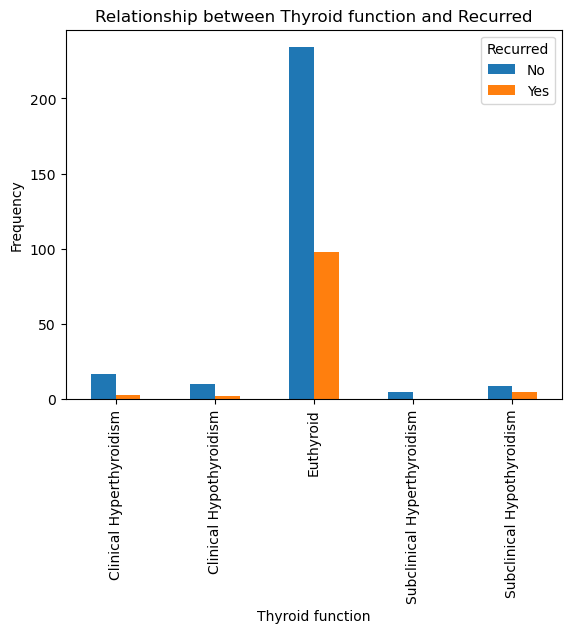

In [27]:
contingency_table.plot(kind='bar')
plt.title('Relationship between Thyroid function and Recurred')
plt.xlabel('Thyroid function')
plt.ylabel('Frequency')
plt.show()

Euthyroid patients had the highest recurrence in this dataset.

In [29]:
#Examine relationship between physical examination and recurred

#Creating a contigency table

contingency_table = pd.crosstab(df['Physical Examination'], df['Recurred'])
print(contingency_table)

Recurred                      No  Yes
Physical Examination                 
Diffuse goiter                 7    0
Multinodular goiter           88   52
Normal                         5    2
Single nodular goiter-left    63   26
Single nodular goiter-right  112   28


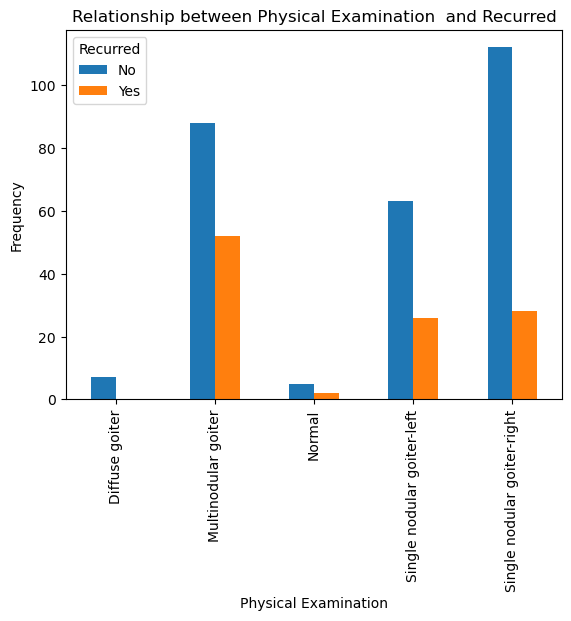

In [30]:
contingency_table.plot(kind='bar')
plt.title('Relationship between Physical Examination  and Recurred')
plt.xlabel('Physical Examination')
plt.ylabel('Frequency')
plt.show()

Patients with multinodular goiter had higher recurrence than other types--single nodular goiter-left, single nodular
goiter-right.

In [32]:
#displaying unique values in all columns
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [33]:
#Encoding the categorical columns using label encoder

columns = ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
for i in columns:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])


In [34]:
df.head()
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,11,0,0,0,0,2,3,3,2,1,Low,0,0,0,0,2,0
1,18,0,0,1,0,2,1,3,2,1,Low,0,0,0,0,1,0
2,14,0,0,0,0,2,4,3,2,1,Low,0,0,0,0,1,0
3,46,0,0,0,0,2,4,3,2,1,Low,0,0,0,0,1,0
4,46,0,0,0,0,2,1,3,2,0,Low,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,56,1,1,1,1,2,4,5,3,1,High,6,2,1,4,0,1
379,63,1,1,0,1,2,1,1,3,0,High,6,2,1,4,3,1
380,56,1,1,1,0,2,1,0,3,0,High,6,2,1,4,3,1
381,45,1,1,1,1,0,1,1,1,0,High,6,2,0,3,3,1


In [35]:
#encoding the risk column-- using mapping
df['Risk'].unique()

array(['Low', 'Intermediate', 'High'], dtype=object)

In [36]:
df['Risk'] = df['Risk'].map({"Low": 0, "Intermediate": 1, "High": 2})
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,11,0,0,0,0,2,3,3,2,1,0,0,0,0,0,2,0
1,18,0,0,1,0,2,1,3,2,1,0,0,0,0,0,1,0
2,14,0,0,0,0,2,4,3,2,1,0,0,0,0,0,1,0
3,46,0,0,0,0,2,4,3,2,1,0,0,0,0,0,1,0
4,46,0,0,0,0,2,1,3,2,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,56,1,1,1,1,2,4,5,3,1,2,6,2,1,4,0,1
379,63,1,1,0,1,2,1,1,3,0,2,6,2,1,4,3,1
380,56,1,1,1,0,2,1,0,3,0,2,6,2,1,4,3,1
381,45,1,1,1,1,0,1,1,1,0,2,6,2,0,3,3,1


In [37]:
df.corr()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
Age,1.000000,0.184618,0.305564,0.133886,0.172025,0.037487,-0.092421,-0.102432,-0.159701,-0.223722,0.294507,0.241208,0.060095,0.233997,0.524690,0.179213,0.257659
Gender,0.184618,1.000000,0.621886,0.175755,0.235865,0.037558,-0.079013,-0.215953,-0.023539,-0.207634,0.295229,0.271949,0.238766,0.211540,0.250215,0.272868,0.328189
Smoking,0.305564,0.621886,1.000000,0.252773,0.297874,0.017750,-0.066707,-0.155523,-0.202167,-0.238494,0.374324,0.377728,0.204305,0.321233,0.426152,0.263184,0.333243
Hx Smoking,0.133886,0.175755,0.252773,1.000000,0.261198,0.022111,-0.027658,-0.050382,-0.095052,-0.001204,0.138403,0.151056,0.044421,0.127209,0.262371,0.042867,0.136073
Hx Radiothreapy,0.172025,0.235865,0.297874,0.261198,1.000000,-0.112998,-0.013437,-0.057781,-0.106469,-0.102415,0.272056,0.225794,0.095535,0.430214,0.461901,0.105908,0.174407
Thyroid Function,0.037487,0.037558,0.017750,0.022111,-0.112998,1.000000,0.097316,-0.044032,0.095392,-0.067081,0.072472,0.067635,0.093452,0.017484,0.046218,0.044829,0.067758
Physical Examination,-0.092421,-0.079013,-0.066707,-0.027658,-0.013437,0.097316,1.000000,0.248599,0.001206,0.304883,-0.187451,-0.140371,-0.141878,-0.010105,-0.105831,-0.129953,-0.131801
Adenopathy,-0.102432,-0.215953,-0.155523,-0.050382,-0.057781,-0.044032,0.248599,1.000000,-0.015111,0.175732,-0.182049,-0.207648,-0.154281,-0.080491,-0.150069,-0.190686,-0.182530
Pathology,-0.159701,-0.023539,-0.202167,-0.095052,-0.106469,0.095392,0.001206,-0.015111,1.000000,0.030219,-0.020351,0.007605,0.241381,-0.095974,-0.111171,-0.019872,0.003272
Focality,-0.223722,-0.207634,-0.238494,-0.001204,-0.102415,-0.067081,0.304883,0.175732,0.030219,1.000000,-0.450615,-0.454832,-0.376692,-0.221931,-0.331892,-0.356521,-0.383776


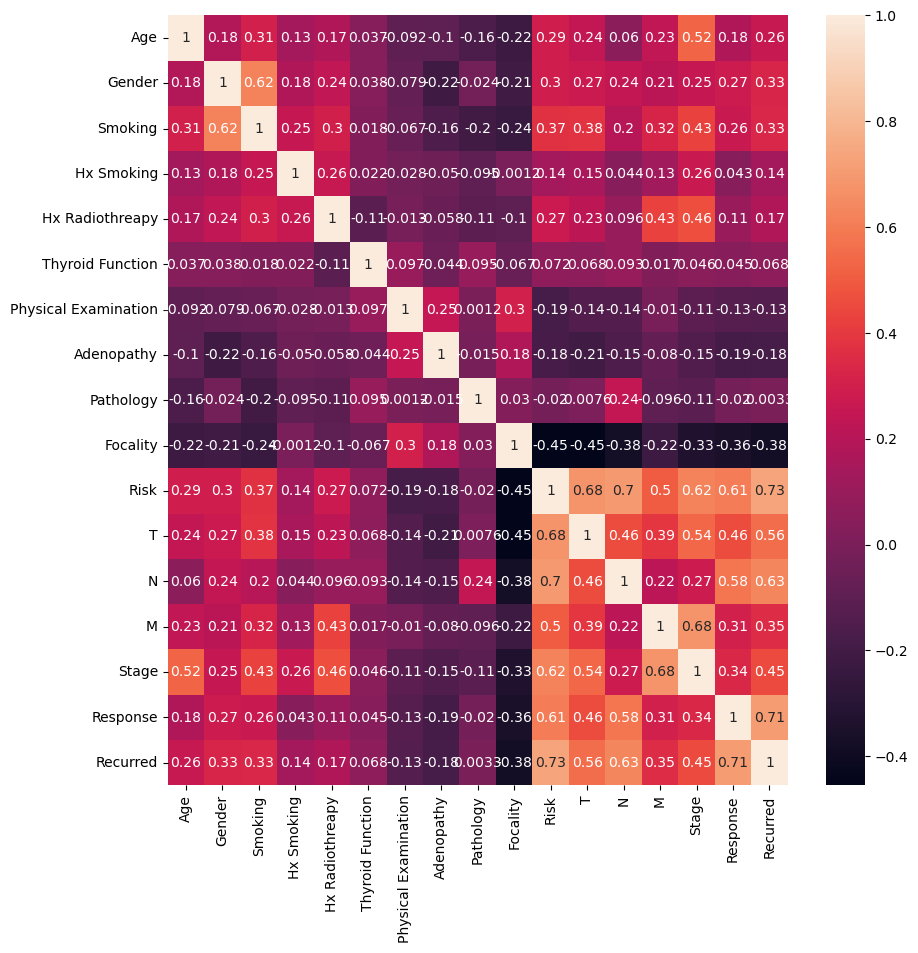

In [38]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot= True)
plt.show()

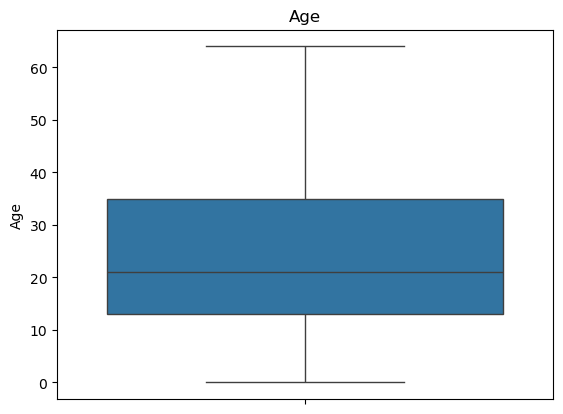

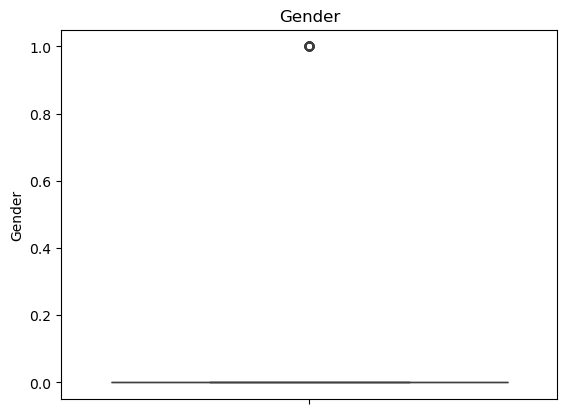

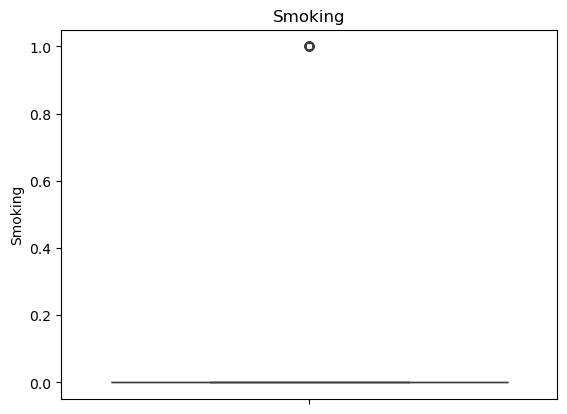

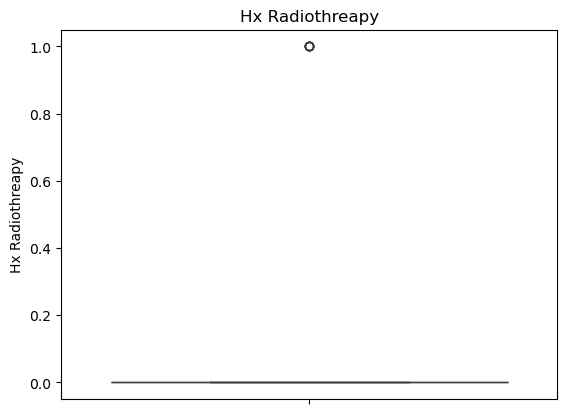

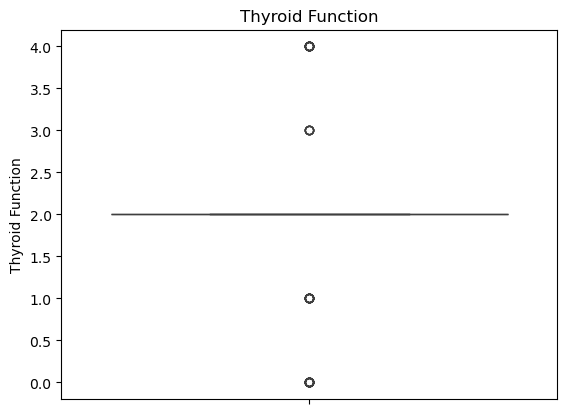

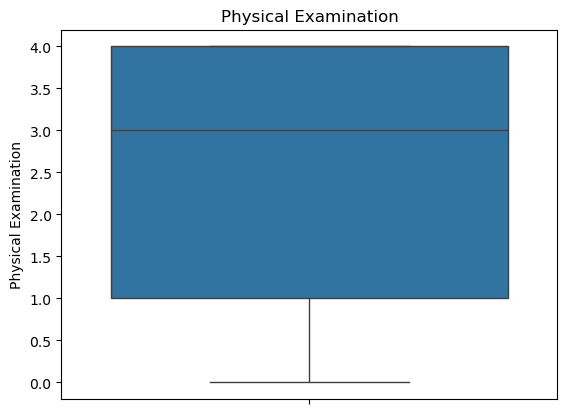

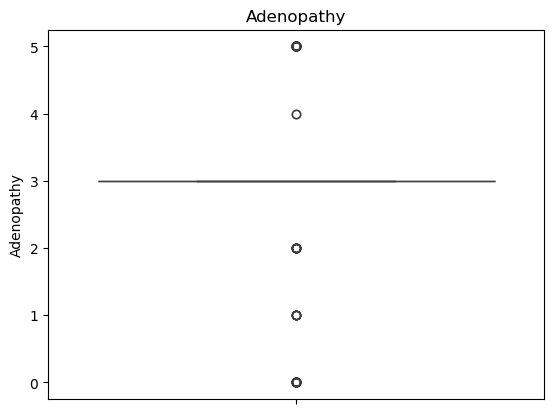

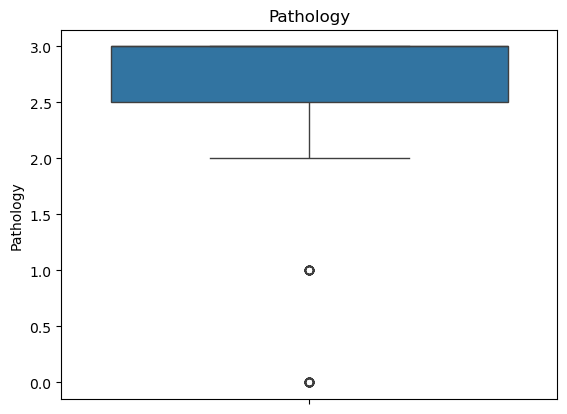

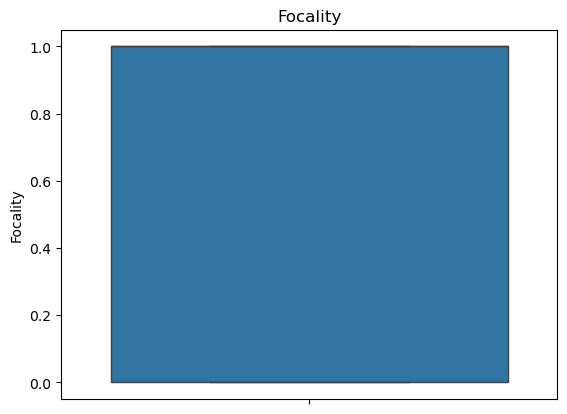

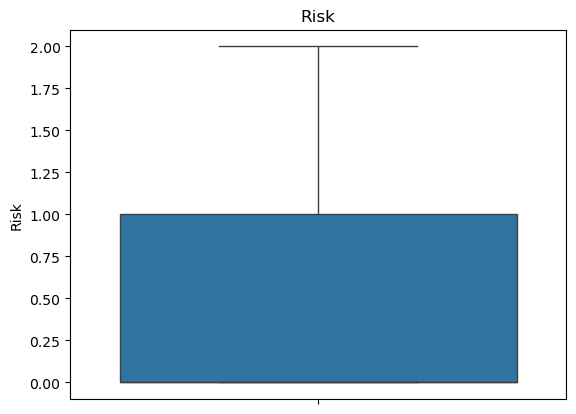

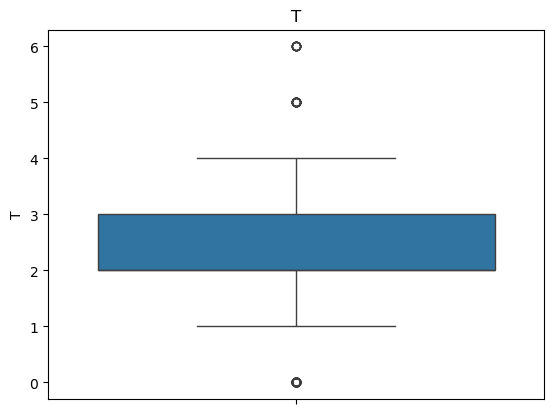

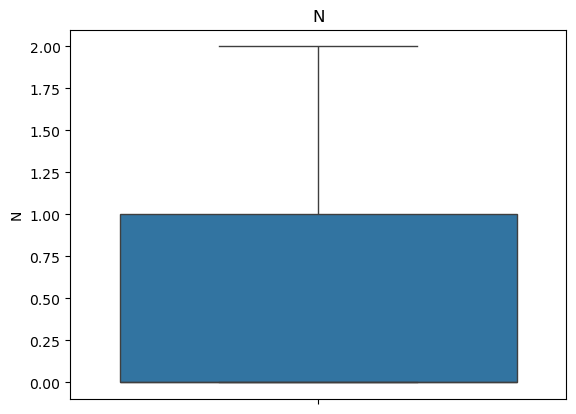

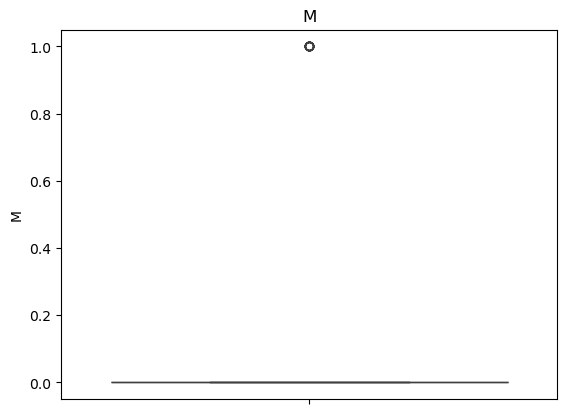

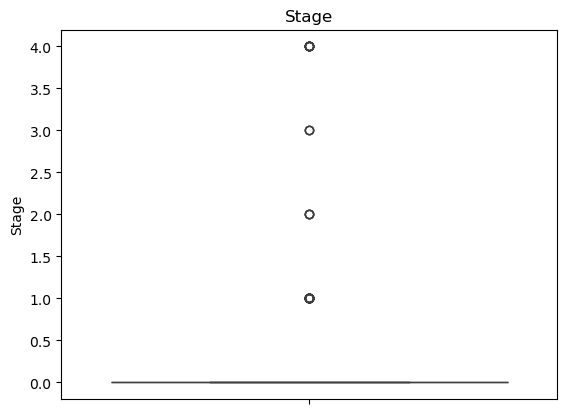

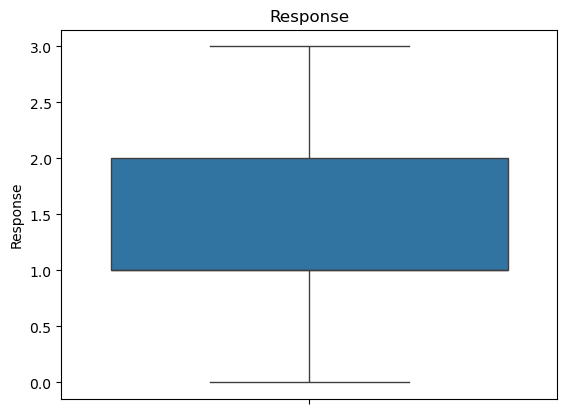

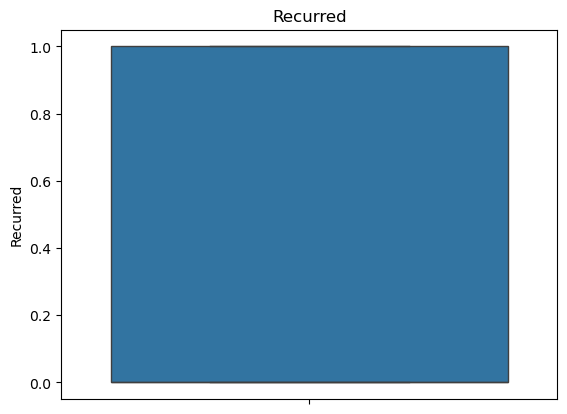

In [39]:
#checking for outliers
#using boxplot
cols=['Age','Gender','Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
for col in cols:
    sns.boxplot(df[col])
    plt.title (f'{col}')
    plt.show()

In [40]:
#checking for duplicates
df.duplicated().sum()

19

In [41]:
#dropping duplicates values
df = df.drop_duplicates()

In [42]:
df.duplicated().sum()

0

# Machine Learning Model

In [44]:
#Building our model
#separating the features into x and y

x= df.drop('Recurred', axis=1)
y= df.Recurred

In [45]:
x.shape

(364, 16)

In [46]:
y.shape

(364,)

In [47]:
#splitting the model into train  and test set
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= 0.2, random_state=10, stratify=y)

## Logistic Regression 

In [49]:
#using the logistic regression model
model = LogisticRegression()

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
model.fit(x_train, y_train)

LogisticRegression()

In [52]:
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
prediction = model.predict(x_test)
prediction[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [54]:
y_test[:10]

245    0
159    0
228    1
360    1
357    1
71     0
347    1
273    0
227    1
140    0
Name: Recurred, dtype: int32

In [55]:
#EVALUATING THE MODEL

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.85      0.77      0.81        22

    accuracy                           0.89        73
   macro avg       0.88      0.86      0.87        73
weighted avg       0.89      0.89      0.89        73



In [58]:
print(confusion_matrix(y_test, prediction))

[[48  3]
 [ 5 17]]


## Random Forest Classifier

In [60]:
#using the randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [61]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
pred = rf.predict(x_test)

In [63]:
pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1])

In [64]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.95      0.86      0.90        22

    accuracy                           0.95        73
   macro avg       0.95      0.92      0.93        73
weighted avg       0.95      0.95      0.94        73



In [65]:
print(confusion_matrix(y_test, prediction))

[[48  3]
 [ 5 17]]


In [66]:
import joblib

In [67]:
joblib.dump(rf, 'randomforest.joblib')

['randomforest.joblib']

In [68]:
joblib.load('randomforest.joblib')

RandomForestClassifier()

In [69]:
rf.predict(x_train)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1])

## Decision Tree Classifier

In [71]:
#using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
ypred = DTC.predict(x_test)
ypred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1])

In [73]:
#Evaluatiion
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.85      0.77      0.81        22

    accuracy                           0.89        73
   macro avg       0.88      0.86      0.87        73
weighted avg       0.89      0.89      0.89        73



In [74]:
print(confusion_matrix(y_test, prediction))

[[48  3]
 [ 5 17]]


## K Neighbors Classifier

In [76]:
#using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [77]:
ypred = KNN.predict(x_test)
ypred

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1])

In [78]:
#Evaluatiion
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.85      0.77      0.81        22

    accuracy                           0.89        73
   macro avg       0.88      0.86      0.87        73
weighted avg       0.89      0.89      0.89        73



In [79]:
print(confusion_matrix(y_test, prediction))

[[48  3]
 [ 5 17]]


## SVC

In [81]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(x_train, y_train)

SVC()

In [82]:
ypred = SVM.predict(x_test)
ypred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1])

In [83]:
#Evaluatiion
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.85      0.77      0.81        22

    accuracy                           0.89        73
   macro avg       0.88      0.86      0.87        73
weighted avg       0.89      0.89      0.89        73



In [84]:
print(confusion_matrix(y_test, prediction))

[[48  3]
 [ 5 17]]


## Gradient Boosting Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [87]:
ypred = GBC.predict(x_test)
ypred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1])

In [88]:
#Evaluatiion
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.85      0.77      0.81        22

    accuracy                           0.89        73
   macro avg       0.88      0.86      0.87        73
weighted avg       0.89      0.89      0.89        73



In [89]:
print(confusion_matrix(y_test, prediction))

[[48  3]
 [ 5 17]]


## from all the models used, the random forest classifier has the highest accuracy of 97% hence it is best for prediction

### tuning the random forest classifier to improve on its accuracy

In [92]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
}

In [93]:
# Initialize the RandomForestClassifier and GridSearchCV
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)


In [94]:
# Perform the grid search
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [95]:
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.948509643483343


In [96]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.958904109589041


### tuning the random forest classifier affected the accuracy hence there is no need to tune the model